#Create a joined dataset

### Prep the listings

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [94]:
import airbnblisting as airl

DB_NAME = 'airbnb'
COLL_NAME = 'listings'

In [95]:
reload(airl)

air_listing = airl.AirBnBListing(db_name=DB_NAME, coll_name=COLL_NAME)
air_listing

In [93]:
#Grab a list of listing_ids & neighborhoods for all the listings
listing_list = list(air_listing.coll.find({},{'_id':1, 'neighborhood':1}))
print len(listing_list)
listing_list[:5]

4228


[{u'_id': u'0', u'neighborhood': u'N/A'},
 {u'_id': u'6751767', u'neighborhood': u'N/A'},
 {u'_id': u'2066868', u'neighborhood': u'Western Addition/NOPA'},
 {u'_id': u'6', u'neighborhood': u'North Park'},
 {u'_id': u'4', u'neighborhood': u'N/A'}]

In [97]:
#test an example
x = listing_list[19]   # Used 20 for no damn good reason
air_listing.pull_from_db(listing_id = x['_id'])
x, air_listing.url

({u'_id': u'267820', u'neighborhood': u'Twin Peaks'},
 u'https://www.airbnb.com/rooms/267820')

In [98]:
#check the extract_features functionality
d = air_listing._extract_clean_description().split()
d

[u'cozy',
 u'clean',
 u'quiet',
 u'and',
 u'with',
 u'flair',
 u'our',
 u'apartment',
 u'is',
 u'located',
 u'in',
 u'the',
 u'twin',
 u'peaks',
 u'neighborhood',
 u'right',
 u'in',
 u'the',
 u'middle',
 u'of',
 u'the',
 u'city',
 u'of',
 u'san',
 u'francisco',
 u'situated',
 u'up',
 u'at',
 u'one',
 u'of',
 u'the',
 u'highest',
 u'elevations',
 u'in',
 u'the',
 u'city',
 u'the',
 u'breathtaking',
 u'views',
 u'of',
 u'san',
 u'francisco',
 u'and',
 u'the',
 u'bay',
 u'are',
 u'the',
 u'highlight',
 u'of',
 u'our',
 u'place',
 u'a',
 u'5',
 u'10',
 u'minute',
 u'hike',
 u'up',
 u'the',
 u'hill',
 u'will',
 u'take',
 u'you',
 u'to',
 u'one',
 u'on',
 u'the',
 u'most',
 u'visited',
 u'spots',
 u'in',
 u'san',
 u'francisco',
 u'the',
 u'top',
 u'of',
 u'twin',
 u'peaks',
 u'has',
 u'a',
 u'360',
 u'degree',
 u'view',
 u'of',
 u'the',
 u'entire',
 u'city',
 u'including',
 u'the',
 u'golden',
 u'gate',
 u'bridge',
 u'and',
 u'alcatraz',
 u'the',
 u'hill',
 u'is',
 u'a',
 u'great',
 u'place'

### Extract all descriptions

In [23]:
corpus = []
for l in listing_list:
    air_listing.pull_from_db(listing_id = l['_id'])
    corpus.append(air_listing._extract_clean_description())

360 4228 0.09


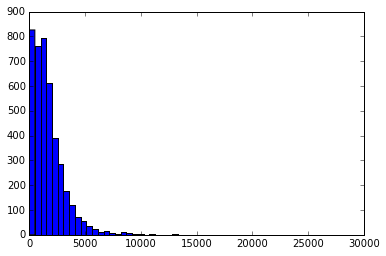

In [90]:
#EDA - how many listings are 0 length?
lens = [len(x) for x in corpus]
zeros = [x==0 for x in lens]
print sum(zeros), len(corpus), round(float(sum(zeros))/len(corpus),2)
plt.hist(lens, bins=50)
plt.show()

In [114]:
#create a word_corpus of the words in the corpus
word_corpus = [x.encode('ascii','ignore').split() for x in corpus]
len(word_corpus)

4228

In [113]:
# add the words to the listing
for listing, words in zip(listing_list, word_corpus):
    listing['words'] = words

{u'_id': u'0', u'neighborhood': u'N/A', 'words': []}

#Map neighborhoods to traits!

In [115]:
import airbnbneighborhood as airn

DB_NAME = 'airbnb'
COLL_NAME_NEIGHBORHOOD = 'neighborhoods'

In [116]:
reload(airn)

air_hood = airn.AirBnBNeighborhood(db_name=DB_NAME, coll_name=COLL_NAME_NEIGHBORHOOD)
air_hood

In [119]:
#Grab the hood list
hood_list = list(air_hood.coll.find({},{'_id':1, 'neighborhood':1, 'traits':1}))
hood_list[0]

{u'_id': 0,
 u'neighborhood': u'Alamo Square',
 u'traits': [u'Loved by San Franciscans', u'Stunning Views', u'Touristy']}

In [186]:
set(sum([x['traits'] for x in hood_list]))

{u'Artsy',
 u'Cultural Enclaves',
 u'Dining',
 u'Great Transit',
 u'Loved by New Yorkers',
 u'Loved by San Franciscans',
 u'Nightlife',
 u'Peace & Quiet',
 u'Shopping',
 u'Stunning Views',
 u'Touristy',
 u'Trendy'}

In [193]:
#Make a dict to make it easier to map
clean_label_map = {'Artsy':'LABEL_artsy',
                 'Cultural Enclaves':'LABEL_cultural_enclave',
                 'Dining':'LABEL_dining',
                 'Great Transit':'LABEL_great_transit',
                 'Loved by New Yorkers':'LABEL_loved_by_locals',
                 'Loved by San Franciscans':'LABEL_loved_by_locals',
                 'Nightlife':'LABEL_nightlife',
                 'Peace & Quiet':'LABEL_peace_and_quiet',
                 'Shopping':'LABEL_shopping',
                 'Stunning Views':'LABEL_stunning_views',
                 'Touristy':'LABEL_touristy',
                 'Trendy':'LABEL_trendy'}

for hood in hood_list:
    hood['traits'] = map(lambda x: clean_label_map[x],hood['traits'])
    
hood_to_traits = {x['neighborhood']:x['traits'] for x in hood_list}
hood_to_traits

{u'Alamo Square': ['LABEL_loved_by_locals',
  'LABEL_stunning_views',
  'LABEL_touristy'],
 u'Alphabet City': ['LABEL_nightlife',
  'LABEL_trendy',
  'LABEL_artsy',
  'LABEL_shopping',
  'LABEL_dining'],
 u'Astoria': ['LABEL_loved_by_locals'],
 u'Battery Park City': ['LABEL_peace_and_quiet'],
 u'Bayview': ['LABEL_artsy', 'LABEL_peace_and_quiet'],
 u'Bedford-Stuyvesant': ['LABEL_artsy', 'LABEL_cultural_enclave'],
 u'Bernal Heights': ['LABEL_stunning_views',
  'LABEL_peace_and_quiet',
  'LABEL_loved_by_locals',
  'LABEL_dining'],
 u'Boerum Hill': ['LABEL_peace_and_quiet',
  'LABEL_nightlife',
  'LABEL_loved_by_locals',
  'LABEL_dining',
  'LABEL_great_transit'],
 u'Brooklyn Heights': ['LABEL_peace_and_quiet',
  'LABEL_loved_by_locals',
  'LABEL_great_transit'],
 u'Bushwick': ['LABEL_artsy',
  'LABEL_cultural_enclave',
  'LABEL_dining',
  'LABEL_great_transit'],
 u'Carroll Gardens': ['LABEL_peace_and_quiet',
  'LABEL_nightlife',
  'LABEL_dining',
  'LABEL_loved_by_locals',
  'LABEL_great_

In [194]:
for listing in listing_list:
    if listing['neighborhood'] in hood_to_traits:
        listing['traits'] = hood_to_traits[listing['neighborhood']]

In [195]:
#Number of lisitngs that mapped a neighborhood
sum(['traits' in x for x in listing_list])

3369

In [197]:
#Number of lisitngs that mapped a neighborhood with a trait 
model_data = [l for l in listing_list if 'traits' in l if l['traits'] != []]
len(model_data)

3181

#Build Doc2Vec model

In [136]:
from gensim.models import Word2Vec

###test Word2Vec

In [156]:
docs = [x['words'] for x in model_data]
model = Word2Vec(docs)

In [157]:
#playing around with Word2Vec
model.most_similar(positive=['neighborhood'], negative=['local'], topn=10)

[('loft', 0.5207953453063965),
 ('originally', 0.5049461126327515),
 ('rare', 0.5005202293395996),
 ('1907', 0.4987376928329468),
 ('become', 0.4931432902812958),
 ('1906', 0.48724865913391113),
 ('1908', 0.477723091840744),
 ('incredibly', 0.47167205810546875),
 ('bask', 0.4708530902862549),
 ('oasis', 0.4697762429714203)]

In [158]:
#Most common words
from collections import defaultdict

d = defaultdict(int)
for word, obj in model.vocab.iteritems():
    d[word] = obj.count
sorted(dict(d), key=lambda x: d[x], reverse=True)

['the',
 'and',
 'a',
 'to',
 'is',
 'in',
 'of',
 'you',
 'with',
 'for',
 'are',
 'on',
 'from',
 'i',
 'or',
 'we',
 'it',
 'have',
 'your',
 'apartment',
 'there',
 'room',
 'will',
 'as',
 's',
 'this',
 'be',
 'street',
 'all',
 'can',
 'at',
 'that',
 'if',
 'walk',
 'away',
 'has',
 'kitchen',
 '2',
 'one',
 'park',
 'our',
 'also',
 'blocks',
 'neighborhood',
 'city',
 'restaurants',
 'bed',
 'bedroom',
 'access',
 'an',
 'very',
 'living',
 '1',
 'by',
 'new',
 'home',
 'but',
 'great',
 'full',
 'two',
 'my',
 'guests',
 'so',
 'just',
 'san',
 'not',
 'block',
 'located',
 'area',
 'out',
 'available',
 'building',
 'minutes',
 'francisco',
 'house',
 'up',
 'train',
 '3',
 '5',
 'bathroom',
 'parking',
 'space',
 'private',
 'stay',
 'bus',
 'please',
 'no',
 'other',
 'subway',
 'large',
 'which',
 'square',
 'well',
 'minute',
 'walking',
 'free',
 'coffee',
 'get',
 'tv',
 'like',
 'manhattan',
 'mission',
 'need',
 'floor',
 'queen',
 'easy',
 'within',
 'time',
 'abou

#Doc2Vec Model Creation

In [159]:
from gensim.models.doc2vec import LabeledSentence, Doc2Vec

In [209]:
labeled_listings = []
for listing in model_data:
    labeled_listing = LabeledSentence(words = listing['words'], labels = listing['traits'] + ["LISTING_" + listing['_id']])
    labeled_listings.append(labeled_listing)

In [210]:
model = Doc2Vec(labeled_listings)

In [217]:
model.most_similar('fun', topn=20)

[('taylor', 0.39499568939208984),
 ('productive', 0.38898104429244995),
 ('noisy', 0.38604968786239624),
 ('active', 0.3811081349849701),
 ('gentrifying', 0.3771779537200928),
 (u'LISTING_4796371', 0.37684109807014465),
 ('cocktails', 0.37566667795181274),
 ('parlors', 0.3647635579109192),
 ('gay', 0.3520309627056122),
 ('sprung', 0.3517349660396576),
 ('novels', 0.3507840633392334),
 ('families', 0.3497425615787506),
 (u'LISTING_4014209', 0.3486199975013733),
 ('sociable', 0.34821659326553345),
 ('cultures', 0.3479573130607605),
 ('emergencies', 0.3441176414489746),
 ('exhibitions', 0.33646345138549805),
 ('inviting', 0.3353589177131653),
 ('suited', 0.3325769603252411),
 ('pedestrian', 0.33235761523246765)]

In [219]:
air_listing.pull_from_db(listing_id = '4014209')
air_listing.extract_features()

{'address': '45th Avenue, San Francisco (Outer Sunset)',
 'description_raw': u"\nThe Space\nGreat location, close beach, park, museums, restaurants, zoo, golf, etc. Street parking is good....no sticker required. Public transportation within 1-2 blocks. 3-4 people will be comfortable. 1toilet, 1shower, and 1 washroom(separate from bathroom). TV in bedroom, living room and kitchen. WiFi throughout entire 500 plus square feet. There are about 2 dozen stairs to reach apt.\nGuest Access\nThe guest has access to entire apartment, upper deck, Washer/dryer, TVs, Wi-Fi, Etc. Towels and sheets, pots,pans,silverware, etc. The unit is ready to live-in as it is my primary residence.\nInteraction with Guests\nI'm available 24/7 for any needs. I like to stay in touch with guests without being too obtrusive\nThe Neighborhood\nFar yet close to The City.\nPark and Beach are a stones throw away with new restaurants and upgraded parks and public works. A gem in the Greatest City!!!Buffalo Paddock is withi

In [205]:
model_data[0]

{u'_id': u'2066868',
 u'neighborhood': u'Western Addition/NOPA',
 'traits': ['LABEL_nightlife'],
 'words': []}